# Project-2 --> Iris Flower Classification

In [1]:
# importing all libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score,accuracy_score,confusion_matrix
from joblib import dump, load

**Data Collection**

In [2]:
df=pd.read_csv('IRIS.csv') # loading the dataset

In [3]:
df.head() # information of first 5 rows

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
le=LabelEncoder()
df['species']=le.fit_transform(df['species'])

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.info() # Preprocesing the data sets 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [7]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [8]:
df.duplicated().sum()

3

In [9]:
df=df.drop_duplicates(keep='first')

**Feature Analysis**

In [10]:
df['species'].value_counts()

1    50
2    49
0    48
Name: species, dtype: int64

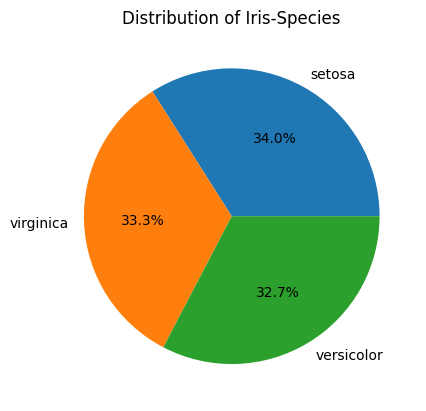

In [11]:
plt.pie(df['species'].value_counts(),labels=['setosa','virginica','versicolor'],autopct='%1.1f%%')
plt.title("Distribution of Iris-Species")
plt.show()

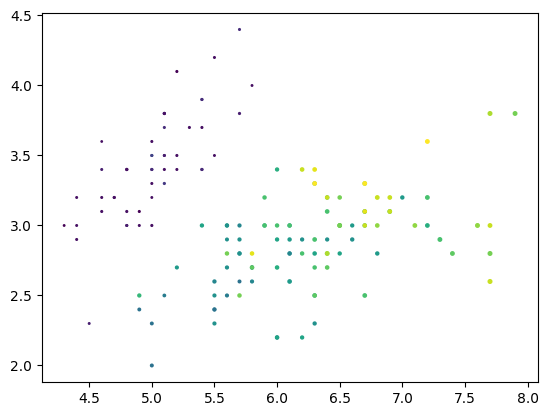

In [12]:
# Plotting between the features
plt.scatter(df['sepal_length'],df['sepal_width'],df['petal_length'],df['petal_width'])

array([[<AxesSubplot: xlabel='sepal_length', ylabel='sepal_length'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='sepal_length'>,
        <AxesSubplot: xlabel='petal_length', ylabel='sepal_length'>,
        <AxesSubplot: xlabel='petal_width', ylabel='sepal_length'>],
       [<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='sepal_width'>,
        <AxesSubplot: xlabel='petal_length', ylabel='sepal_width'>,
        <AxesSubplot: xlabel='petal_width', ylabel='sepal_width'>],
       [<AxesSubplot: xlabel='sepal_length', ylabel='petal_length'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='petal_length'>,
        <AxesSubplot: xlabel='petal_length', ylabel='petal_length'>,
        <AxesSubplot: xlabel='petal_width', ylabel='petal_length'>],
       [<AxesSubplot: xlabel='sepal_length', ylabel='petal_width'>,
        <AxesSubplot: xlabel='sepal_width', ylabel='petal_width'>,
        <AxesSubplot: xlabel='petal_length',

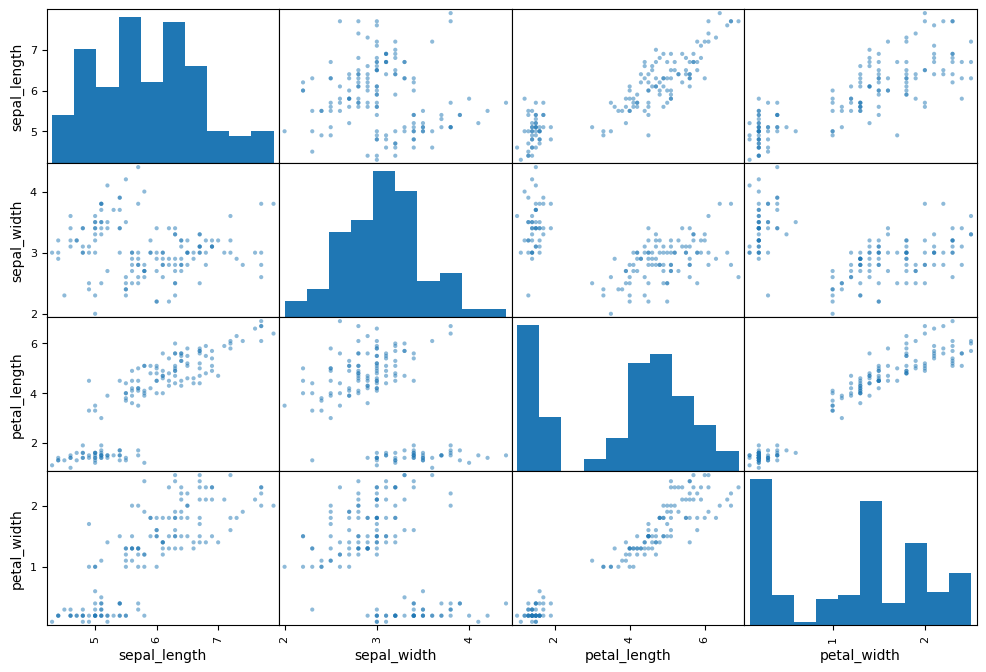

In [13]:
# to see the relations between features
attributes=['sepal_length','sepal_width','petal_length','petal_width']
scatter_matrix(df[attributes],figsize=(12,8))

In [14]:
# !pip install ydata-profiling
# from ydata_profiling import ProfileReport

In [15]:
# prof=ProfileReport(df)
# prof.to_file(output_file='output.html')

**Model Training**

In [16]:
# Extracting Input & Output Columns
X=df.iloc[:,0:4] # all the rows and (0-3) columns
Y=df.iloc[:,-1]  # all the rows and last column

In [17]:
# Train-Test Splitting
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1)

In [18]:
sc=StandardScaler()

In [19]:
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [20]:
# training the model
model=LogisticRegression()

In [21]:
model.fit(X_train,Y_train)

LogisticRegression()

In [22]:
Y_predicted=model.predict(X_test)

In [23]:
confusion_matrix(Y_test,Y_predicted)

array([[7, 0, 0],
       [0, 4, 1],
       [0, 0, 3]], dtype=int64)

In [24]:
pre=precision_score(Y_test,Y_predicted,average='macro')
rec=recall_score(Y_test,Y_predicted,average='macro')

print("Precision Score--> ",pre)
print("Recall Score--> ",rec)

Precision Score-->  0.9166666666666666
Recall Score-->  0.9333333333333332


In [25]:
# checking the accuracy
accuracy_score(Y_test,Y_predicted)

0.9333333333333333

**Save the Model**

In [26]:
# saving the model
dump(model, 'IRISFlowerClassifier.joblib')

['IRISFlowerClassifier.joblib']

**Result**

In [38]:
# test
features=[]
print("Enter the sepal-length,sepal-width,petal-length,petal-width respectively-->")
for i in range(1):
    a=[]
    for j in range(4):
        a.append(float(input()))
    features.append(a)
    
ans=model.predict(features)

if(ans[0]==0):
    print("The Flower is--> Iris-setosa")
elif(ans[0]==1):
    print("The Flower is--> Iris-versicolor")
else:
    print("The Flower is--> Iris-virginica")

Enter the sepal-length,sepal-width,petal-length,petal-width respectively-->
5.8
5.9
7.9
6.0
The Flower is--> Iris-virginica


# Thank You